### Wine Quality Prediction using Decision Tree - Random Forest

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [247]:
wine_dataset = pd.read_csv("/Users/pavansaipendry/Desktop/Master's/Machine Learning/Projects/Wine Quality Prediction/winequality-red.csv")
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [248]:
wine_dataset.shape

(1599, 12)

In [249]:
wine_dataset.value_counts(['quality'])

quality
5          681
6          638
7          199
4           53
8           18
3           10
Name: count, dtype: int64

In [250]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data Analysis

In [251]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


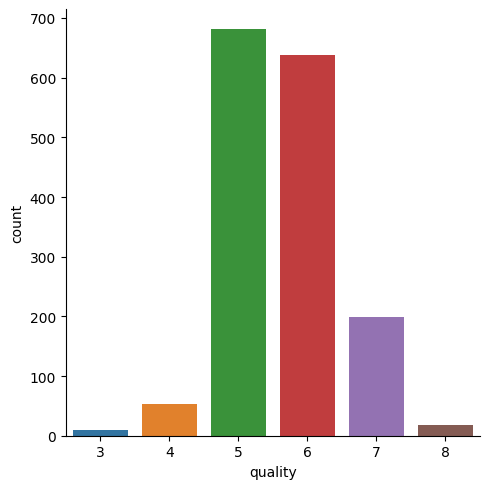

In [252]:
sns.catplot(x='quality',data = wine_dataset, kind = 'count')

Checking the relation btn volatile acidity and Quality

<Axes: xlabel='quality', ylabel='volatile acidity'>

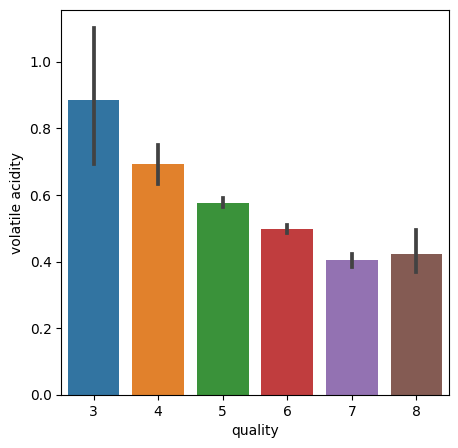

In [253]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality' , y = "volatile acidity" , data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

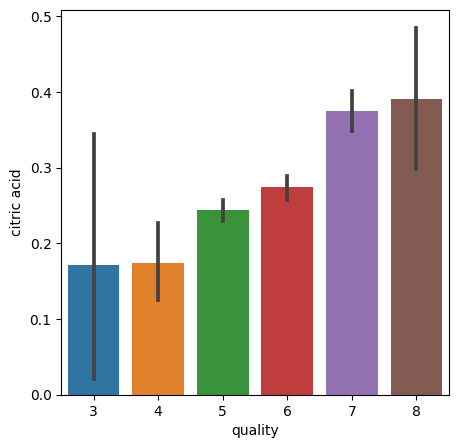

In [254]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality' , y = "citric acid" , data = wine_dataset)

Correlation 

In [255]:
correlation = wine_dataset.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Heatmap

<Axes: >

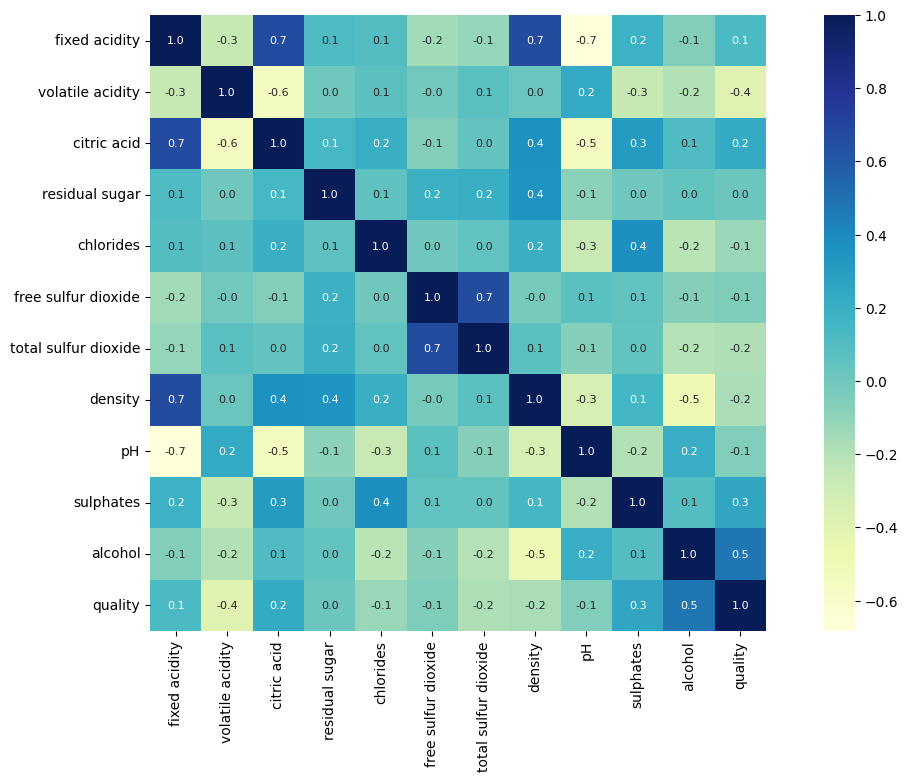

In [256]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation , cbar = True , square= True , fmt='.1f' , annot=True ,annot_kws={'size' : 8}, cmap = "YlGnBu")

### Data Pre-Processing

In [257]:
X = wine_dataset.drop(['quality'], axis = 1)

Label Binarization

In the quality, if we see clearly, there are multiple
types of qualities. 

What we need to do is, if the quality is > 6 then it is Good/1. else Bad/0.

In [258]:
Y = wine_dataset['quality'].apply(lambda x:1 if x > 4 else 0)

In [259]:
print(X.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  


In [260]:
# print(Y)
print(Y.value_counts())

quality
1    1536
0      63
Name: count, dtype: int64


### Standardisation of Data

In [261]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
standard_data = scalar.fit_transform(X)

In [262]:
X = standard_data
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

### Train Test Split

In [263]:
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, stratify=Y , random_state=2)

In [264]:
print(X_train.shape ,X_test.shape, y_train.shape , y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


### Random Forest Classifier

In [265]:
model = RandomForestClassifier()

In [266]:
model.fit(X_train, y_train)

RandomForestClassifier()

### Evaluation of Model

Accuracy on Train Data and Test Data

In [267]:
x_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [268]:
print("Accuracy Score on train data" , train_data_accuracy)

Accuracy Score on train data 1.0


In [269]:
x_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [270]:
print("Accuracy Score on test data" , test_data_accuracy)

Accuracy Score on test data 0.95625


### Predictive System

In [271]:
input_data = (7.6,0.51,0.15,2.8,0.11,33.0,73.0,0.9955,3.17,0.63,10.2)

x_input_data_asarray = np.asarray(input_data)

x_input_data_reshape = x_input_data_asarray.reshape(1,-1)

standard_data_x_input_data_reshape = scalar.fit_transform(x_input_data_reshape)

predict_value = model.predict(standard_data_x_input_data_reshape)

if predict_value[0] == 1:
    print("Good Quality")

else:
    print("Not Good quality")

Good Quality
